# NOTE: 
**This demo notebook was used to generate the Test Suites and Run results recorded in the directory. Please feel free to use this as a reference when creating your own Test Suites and Test Runs.**

**Running this notebook directly will result in errors. If you want to run the notebook as is, either:**
1. Change the name of the Test Suite 
2. Delete the results from the directory
3. Set the `BENCH_FILE_DIR` environment variable (which defaults to `./bench`) to a different directory. To do this, uncomment the cell below:

In [1]:
# #uncomment me to change the default `BENCH_FILE_DIR`
# import os
# os.environ['BENCH_FILE_DIR'] = 'FILL ME IN'

# ArthurBench: Evaluating answers to coding questions with BERTScore distance from golden answers

In [2]:
import pandas as pd
from arthur_bench.run.testsuite import TestSuite

In [3]:
import arthur_bench

arthur_bench.__file__

'/Users/rowancheung/code/bench/arthur_bench/__init__.py'

In [4]:
stack_df = pd.read_csv('stackoverflow_qa/stack_overflow_golden.csv')
stack_prompt0_df = pd.read_csv('stackoverflow_qa/gpt35_base.csv')
stack_prompt1_df = pd.read_csv('stackoverflow_qa/gpt35_engineered.csv')

In [5]:
stack_df['reference_output'] = stack_df['reference_output'].apply(lambda x: " ".join(x.split(" ")[:100]))

# Make a test suite

In [6]:
my_test_suite = TestSuite(
    'stack_dist_to_golden', 
    "bertscore",
    reference_data=stack_df, 
    input_column='input', 
    reference_column='reference_output')

# Run the test on prompt v1

In [7]:
from time import time

In [9]:
start_time = time()

run0 = my_test_suite.run(
    'prompt39842',
    candidate_data=stack_prompt0_df, 
    candidate_column='candidate_output',
    batch_size=1
)

print(f"execution time: {time() - start_time:.3f} seconds")

3364it [00:11, 281.86it/s]                                                                                                                                             


execution time: 26.340 seconds


# Run tests on prompt v2

In [10]:
run1 = my_test_suite.run(
    'prompt1',
    candidate_data=stack_prompt1_df, 
    candidate_column='candidate_output',
)

3364it [00:18, 183.62it/s]                                                                                                                                             


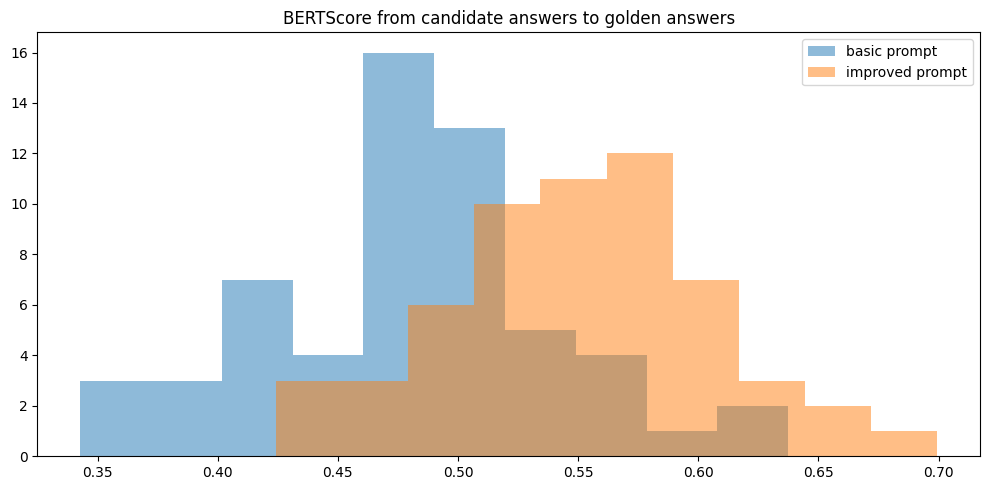

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('BERTScore from candidate answers to golden answers')
ax.hist([s.score for s in run0.test_case_outputs], label='basic prompt', alpha=0.5)
ax.hist([s.score for s in run1.test_case_outputs], label='improved prompt', alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()